### 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Diabetes Classification.csv")
df

,Unnamed: 0,Age,Gender,BMI,Chol,TG,HDL,LDL,Cr,BUN,Diagnosis
0,0,50,F,24,4.20,0.90,2.40,1.40,46.0,4.70,0
1,1,26,M,23,3.70,1.40,1.10,2.10,62.0,4.50,0
2,2,33,M,21,4.90,1.00,0.80,2.00,46.0,7.10,0
3,3,45,F,21,2.90,1.00,1.00,1.50,24.0,2.30,0
4,4,50,F,24,3.60,1.30,0.90,2.10,50.0,2.00,0
...,...,...,...,...,...,...,...,...,...,...,...
5127,5127,54,M,23,5.00,1.50,1.24,2.98,77.0,3.50,1
5128,5128,50,F,22,4.37,2.09,1.37,2.29,47.3,4.40,1
5129,5129,67,M,24,3.89,1.38,1.14,2.17,70.6,4.73,1
5130,5130,60,F,29,5.91,1.29,1.73,2.85,50.2,7.33,1


### 2. Load Data

### 3. Data Preprocessing

In [3]:
data_encoded = pd.get_dummies(df, columns = ["Gender"])

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [5]:
x = data_encoded.drop("Diagnosis", axis = 1)
y = data_encoded["Diagnosis"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

models = {
    "Logistic Regression" : LogisticRegression(),
    "Random Forest" : RandomForestClassifier(),
     "Support Vector Machine" : SVC()
        }

best_model_name = None
best_score = 0

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    if accuracy > best_score:
        best_score = accuracy
        best_model_name = name
    
    print(f"{name} - Accuracy: {accuracy}")

E:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Accuracy: 0.7896786757546251
Random Forest - Accuracy: 0.9980525803310614
Support Vector Machine - Accuracy: 0.9513145082765336


In [6]:
print(f"\nBest Model: {best_model_name} - Accuracy: {accuracy}")


Best Model: Random Forest - Accuracy: 0.9513145082765336


### 6. Data Visualization

In [8]:
correlations = data_encoded.corr()

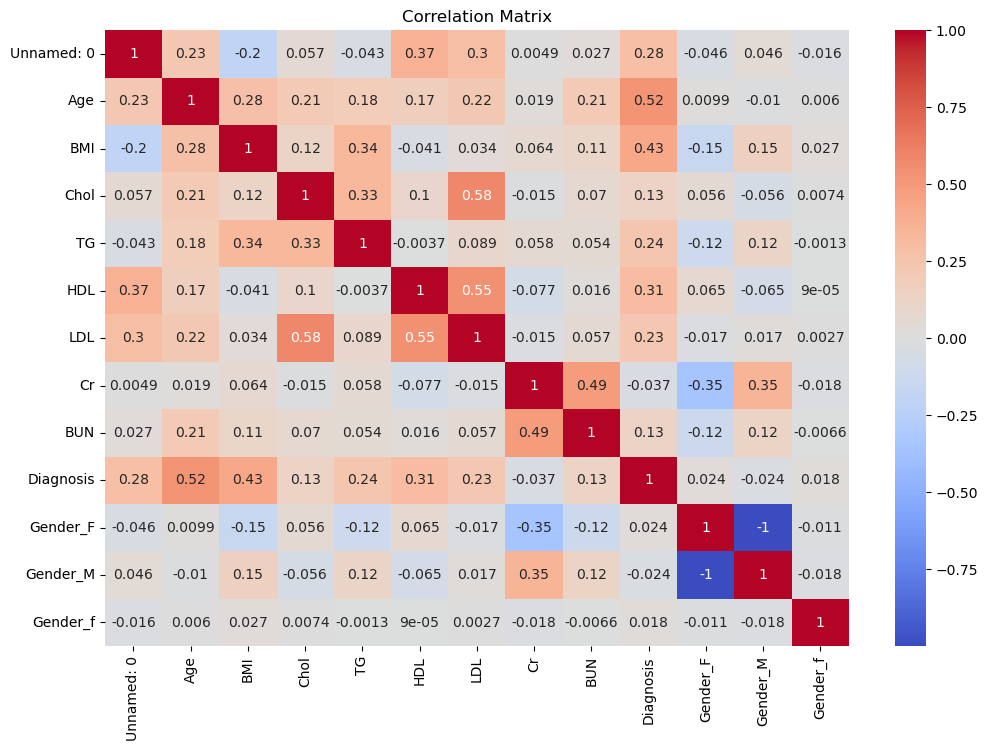

In [9]:
plt.figure(figsize = (12, 8))
sns.heatmap(correlations, annot = True, cmap = "coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [11]:
data_encoded.drop("Unnamed: 0", axis = 1, inplace = True)

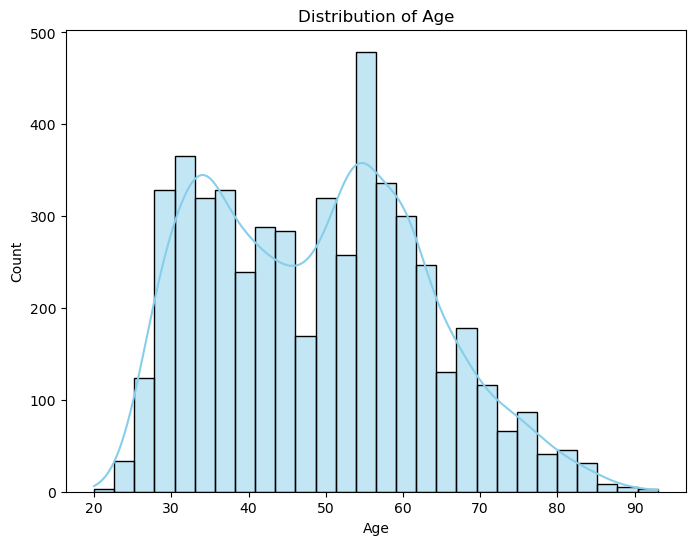

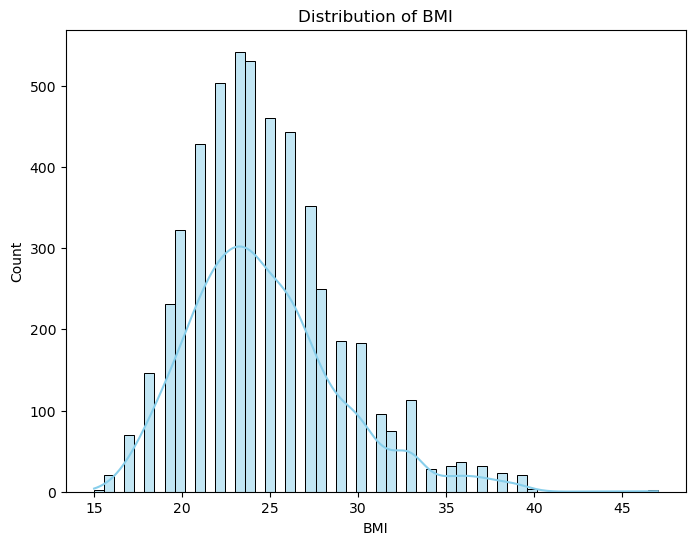

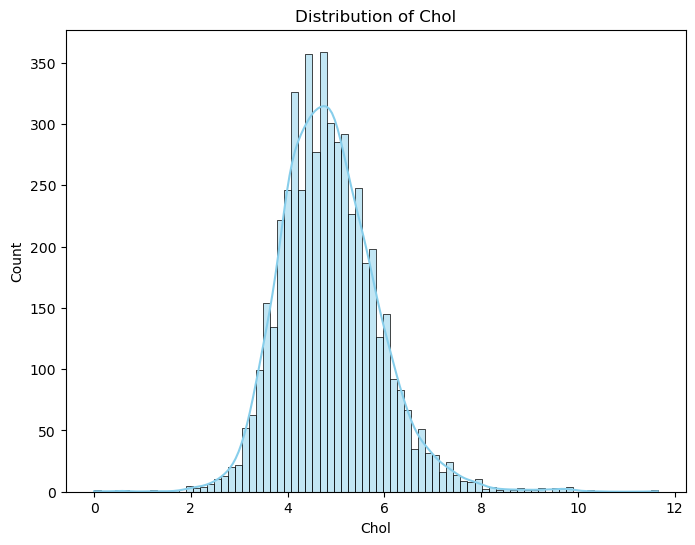

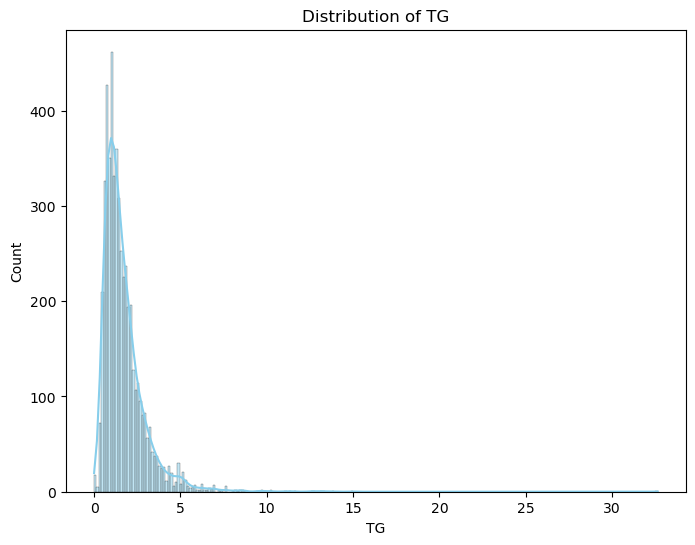

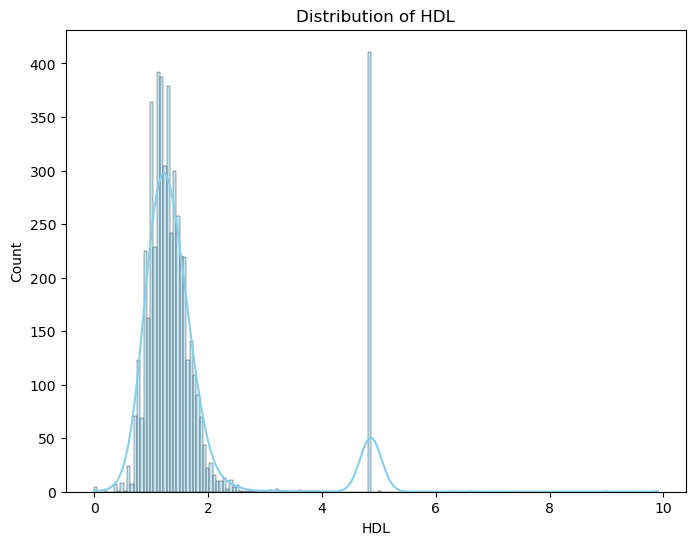

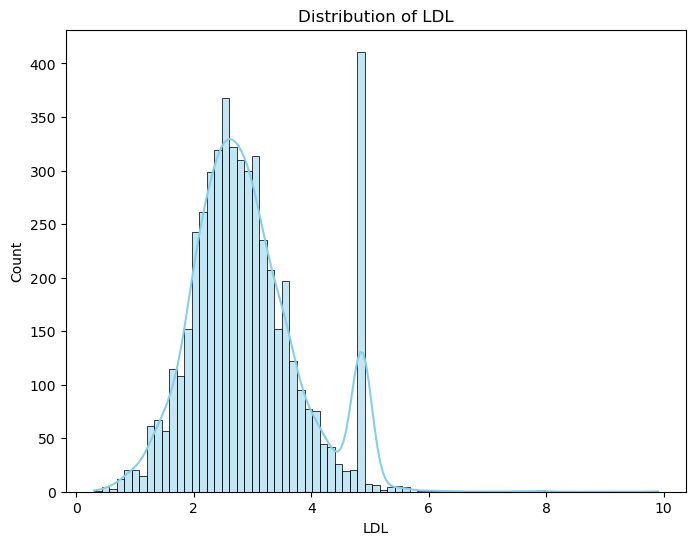

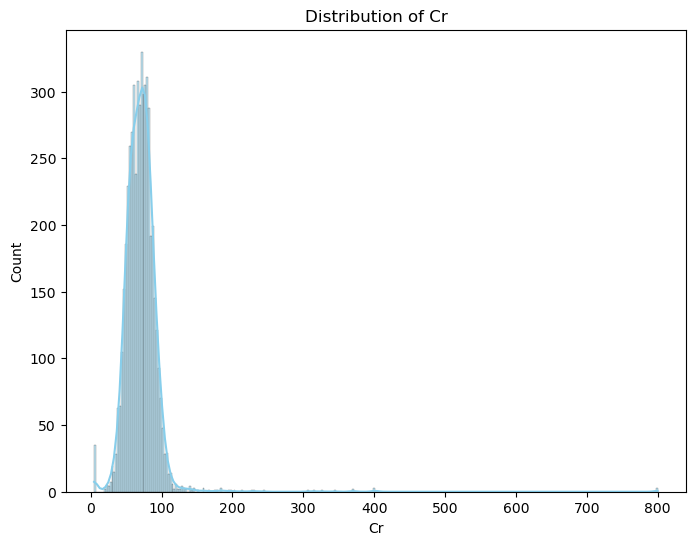

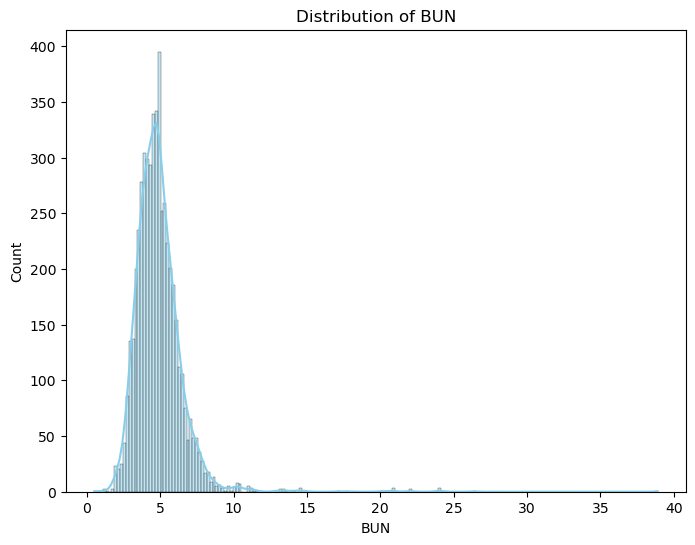

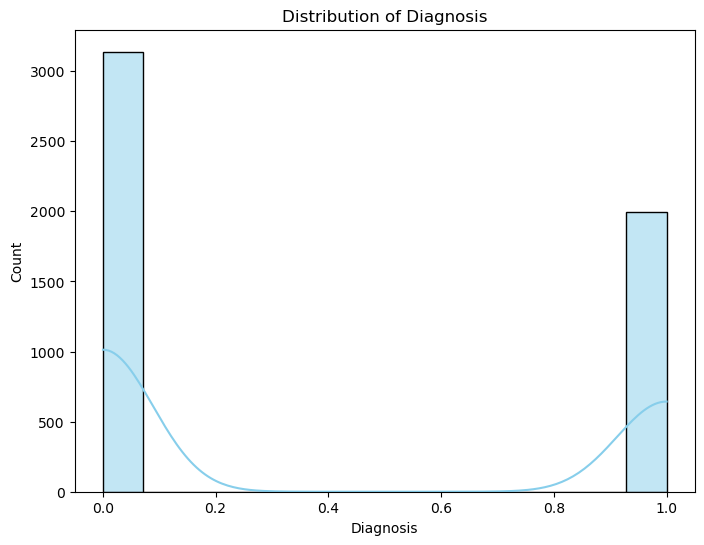

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


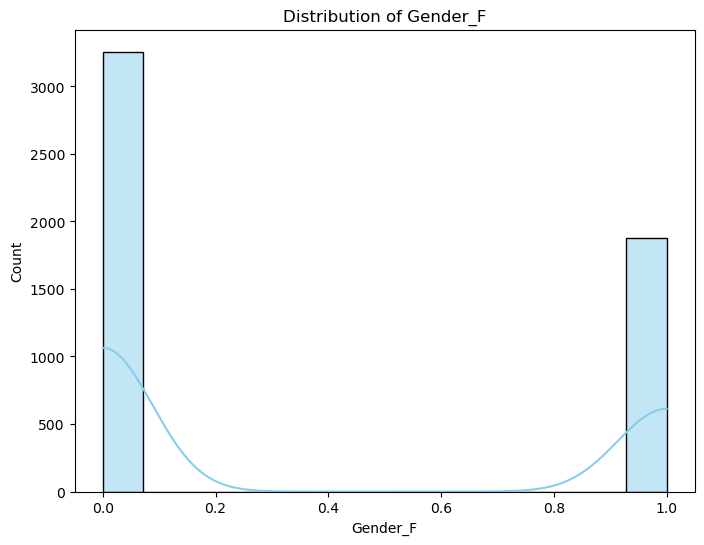

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


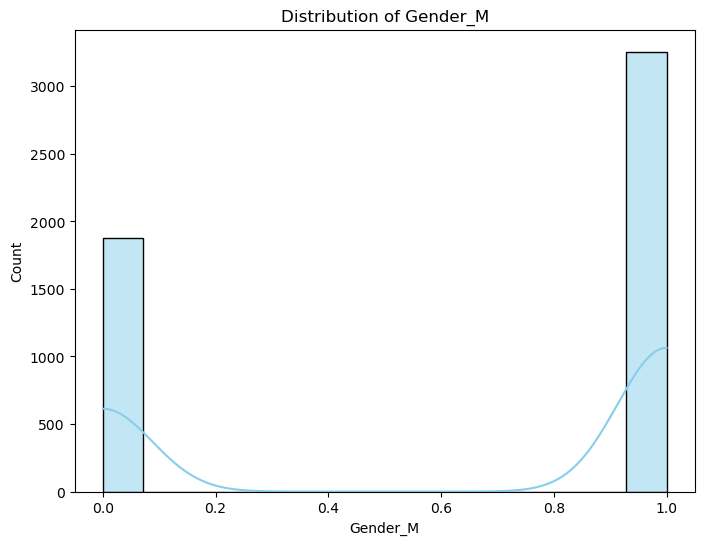

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


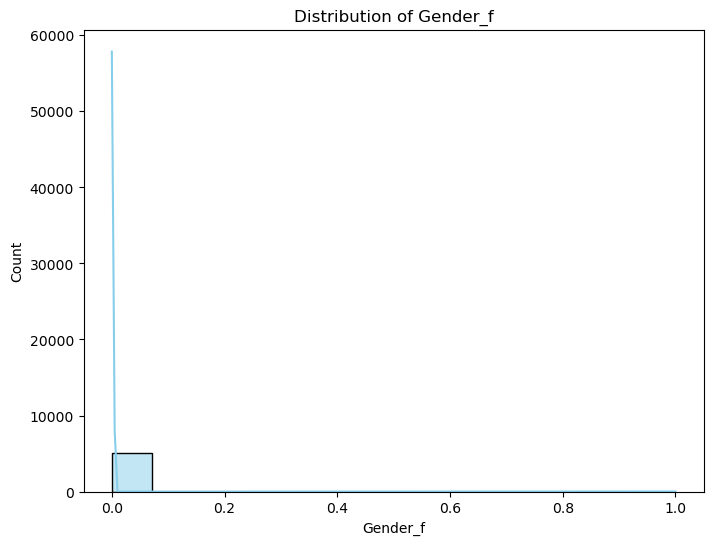

In [12]:
for column in data_encoded.columns:
    plt.figure(figsize = (8, 6))
    sns.histplot(data_encoded[column], kde = True, color = "skyblue")
    plt.title(f"Distribution of {column}")
    plt.show()